In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Clustering on titles

- obtain embeddings for each title
- visualise embeddings using dimension reduction
- do these cluster well with regards to their subject discipline?
- can we predict the subject discpline from the title embeddings

In [ ]:
csv_file = "cleaned_EThOS_CSV_202210.csv"
df = pd.read_csv(csv_file, encoding="ISO-8859-2")
df.head()

In [ ]:
len(df)

In [ ]:
df.isnull().any().any()

## Classification with Titles

In [ ]:
import spacy

# obtain title embeddings
docs = list(nlp.pipe(df["Title"], n_process=6)) 

Just to double check my understanding of obtaining title embeddings from the word embeddings. I think they just take the mean over the array.

In [ ]:
(docs[0].vector == np.array([word.vector for word in docs[0]]).mean(axis=0)).all()

In [ ]:
# only consider the ones with subject disciplines
with_subject_disc_indices = df["Subject Discipline"][df["Subject Discipline"]!=" "].index.tolist()
title_embeddings = np.array([docs[i].vector for i in with_subject_disc_indices])
labels = np.array([df.loc[i, "Subject Discipline"] for i in with_subject_disc_indices])

## Try to visualise embeddings using PCA

In [ ]:
from sklearn.decomposition import PCA
dim = 2
pca = PCA(n_components = dim)
dim_reduced_titles = pca.fit_transform(title_embeddings)

In [ ]:
for label in set(labels):
    indices = np.where(labels == label)
    embeddings = dim_reduced_titles[indices]
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, alpha=0.2, label=label)
plt.legend()
plt.show()

## Classification

First splitting the dataset into a train and test set

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(title_embeddings,
                                                    labels,
                                                    random_state = 0)

## Decision Tree

In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# training a DescisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)

# model accuracy for X_test
print(f"Accuracy: {dtree_model.score(X_test, y_test)}")

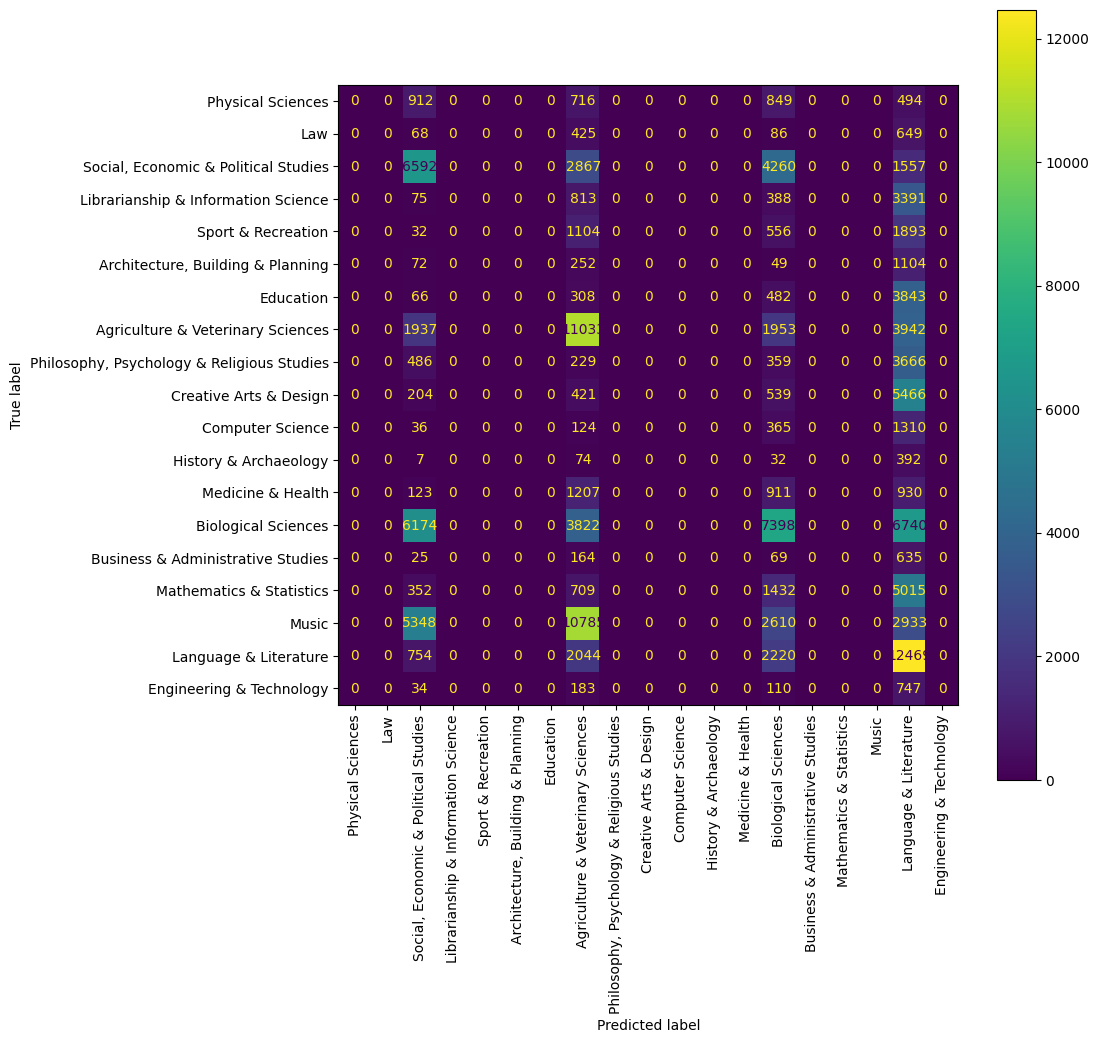

In [117]:
from sklearn.metrics import ConfusionMatrixDisplay

# initialise plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

# creating a confusion matrix
dtree_predictions = dtree_model.predict(X_test)
cm = confusion_matrix(y_test, dtree_predictions)
cm_display = ConfusionMatrixDisplay(cm, display_labels=set(labels)).plot(ax=ax, xticks_rotation="vertical")

## SVM

In [ ]:
from sklearn.svm import SVC

# training a linear SVM classifier
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)

# model accuracy for X_test
print(f"Accuracy: {svm_model_linear.score(X_test, y_test)}")

In [ ]:
# initialise plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

# creating a confusion matrix
svm_predictions = svm_model_linear.predict(X_test)
cm = confusion_matrix(y_test, svm_predictions)
cm_display = ConfusionMatrixDisplay(cm, display_labels=set(labels)).plot(ax=ax, xticks_rotation="vertical")

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# training a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
  
# model accuracy for X_test
print(f"Accuracy: {knn.score(X_test, y_test)}")

In [ ]:
# initialise plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

# creating a confusion matrix
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)
cm_display = ConfusionMatrixDisplay(cm, display_labels=set(labels)).plot(ax=ax, xticks_rotation="vertical")